In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(f"rows {df.shape[0]}")
print(f"column {df.shape[1]}")

rows 150
column 6


In [5]:
dup = df.duplicated().sum()
print(f"number of duplicated rows are {dup}")

number of duplicated rows are 0


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.describe(include='all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


In [11]:
for i in df.columns.tolist():
 print(f"the column is {i} , the number of unique values is {df[i].nunique()}")

the column is Id , the number of unique values is 150
the column is SepalLengthCm , the number of unique values is 35
the column is SepalWidthCm , the number of unique values is 23
the column is PetalLengthCm , the number of unique values is 43
the column is PetalWidthCm , the number of unique values is 22
the column is Species , the number of unique values is 3


In [12]:
data = df.iloc[:, 1:]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


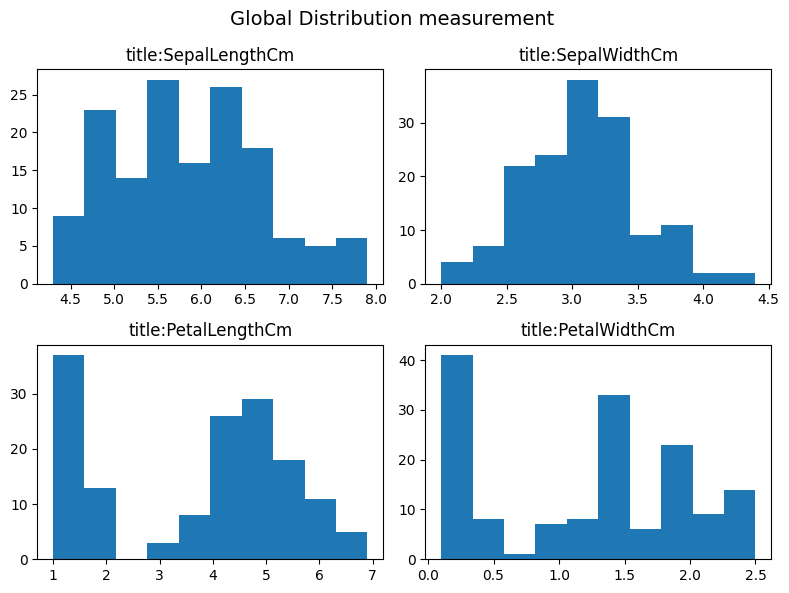

In [17]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))
plt.suptitle('Global Distribution measurement ' , fontsize=14)

plt.subplot(2,2,1)
plt.hist(data['SepalLengthCm'])
plt.title("title:SepalLengthCm")

plt.subplot(2,2,2)
plt.hist(data['SepalWidthCm'])
plt.title("title:SepalWidthCm")

plt.subplot(2,2,3)
plt.hist(data['PetalLengthCm'])
plt.title("title:PetalLengthCm")

plt.subplot(2,2,4)
plt.hist(data['PetalWidthCm'])
plt.title("title:PetalWidthCm")

plt.tight_layout()  # Helps in adjusting the layout
plt.show()

In [18]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

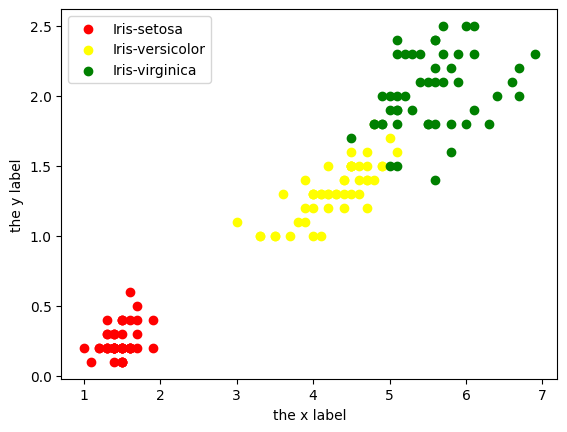

In [20]:
for i in range(3):
 x=data[data['Species'] == species[i]]
 plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

plt.xlabel("the x label")
plt.ylabel("the y label")
plt.legend()
plt.show()

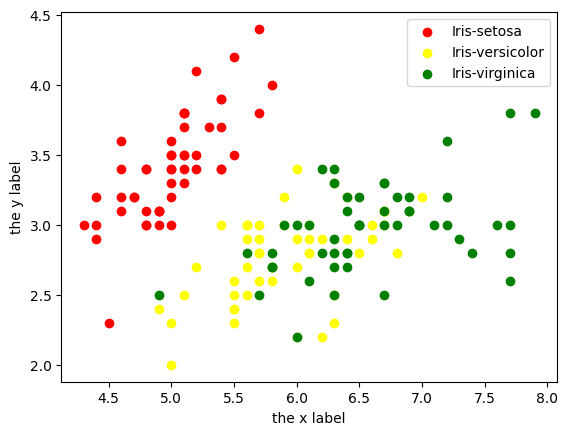

In [21]:
for i in range(3):
 x=data[data['Species'] == species[i]]
 plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

plt.xlabel("the x label")
plt.ylabel("the y label")
plt.legend()
plt.show()

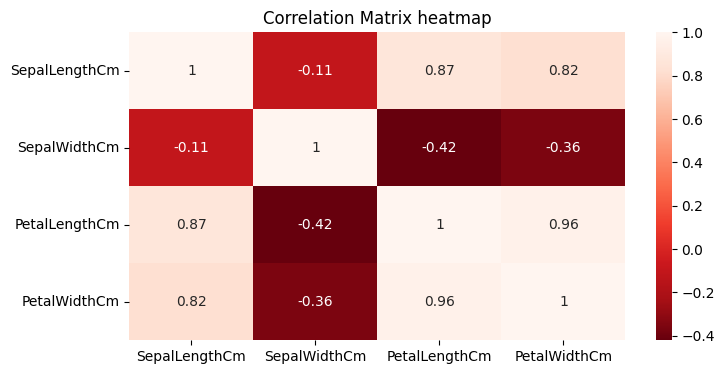

In [28]:
import seaborn as sns

data_f = data.drop(columns=['Species'])
corr = data_f.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='Reds_r')
plt.title('Correlation Matrix heatmap')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Species'] = le.fit_transform(data['Species'])

unique_species = data['Species'].unique()

print(f" the unique values that are converted {unique_species}" )

 the unique values that are converted [0 1 2]


In [32]:
# split the data for inputs and labels 

x=data.drop(columns=['Species'], axis=1)
y=data['Species']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)
y_train.value_counts()

Species
1    41
0    33
2    31
Name: count, dtype: int64